# Cactus plot

Plus d'information dans le README du dossier [courant](./).

## Imports nécessaires

In [1]:
from metrics.wallet import *
from common import *
import matplotlib.pyplot as plt

## Constantes locales

In [2]:
MAP_NAME = {
    '1': '$10\%$',
    '2': '$20\%$',
    '3': '$30\%$',
    '4': '$40\%$',
    '5': '$50\%$',
    '6': '$60\%$',
    '7': '$70\%$',
    'orig': '$\mathtt{original}$',
}

## Analyse importée!

In [3]:
analysis = import_analysis_from_file(ANALYSIS_06_MERGE)

In [4]:
analysis.stat_table()

count      sum     PAR1     PAR2     PAR10  common count  \
experiment_ware                                                                 
fperturb2_chs          536   354858   354858   683658   3314058           299   
fperturb1_chs          534   355685   355685   686885   3336485           299   
cacd                   534   691144   691144  1353544   6652744           299   
fperturb3_chs          533   363804   363804   696204   3355404           299   
fperturb4_chs          529   361198   361198   698398   3395998           299   
fperturb6_chs          526   377150   377150   717950   3444350           299   
chs                    524   706899   706899  1393299   6884499           299   
fperturb5_chs          523   373338   373338   717738   3472938           299   
fperturb1_cacd         516   380802   380802   733602   3556002           299   
fperturb7_chs          516   388152   388152   740952   3563352           299   
fperturb2_cacd         502   392641   392641   762241   3719041           299   
fperturb3_cacd         498   401662   401662   776062   3771262           299   
fperturb4_cacd         488   414310   414310   800710   3891910           299   
fperturb5_cacd         486   416875   416875   805675   3916075           299   
fperturb6_cacd         483   416247   416247   808647   3947847           299   
fperturb7_cacd         482   422718   422718   816318   3965118           299   
fperturb3_ddegondom    456   450288   450288   875088   4273488           299   
fperturb6_ddegondom    455   451360   451360   877360   4285360           299   
fperturb3_activity     454   454276   454276   881476   4299076           299   
fperturb5_activity     454   455056   455056   882256   4299856           299   
fperturb4_ddegondom    452   450917   450917   880517   4317317           299   
fperturb5_ddegondom    452   454214   454214   883814   4320614           299   
fperturb7_ddegondom    451   453072   453072   883872   4330272           299   
fperturb4_activity     450   457649   457649   889649   4345649           299   
fperturb2_ddegondom    449   455941   455941   889141   4354741           299   
fperturb2_activity     449   458302   458302   891502   4357102           299   
fperturb1_ddegondom    446   462433   462433   899233   4393633           299   
fperturb1_activity     444   464238   464238   903438   4417038           299   
fperturb6_activity     443   463272   463272   903672   4426872           299   
fperturb7_activity     441   468741   468741   911541   4453941           299   
fperturb6_impact       416   505600   505600   978400   4760800           299   
fperturb7_impact       414   502998   502998   978198   4779798           299   
fperturb5_impact       414   504207   504207   979407   4781007           299   
fperturb4_impact       413   501089   501089   977489   4788689           299   
fperturb1_impact       411   504912   504912   983712   4814112           299   
fperturb2_impact       411   504958   504958   983758   4814158           299   
activity               411   976999   976999  1934599   9595399           299   
fperturb3_impact       408   511726   511726   994126   4853326           299   
domddeg                402   992931   992931  1972131   9805731           299   
impact                 380  1048484  1048484  2080484  10336484           299   

                     common sum  uncommon count  total  
experiment_ware                                         
fperturb2_chs              3106             237    810  
fperturb1_chs              3072             235    810  
cacd                       4595             235    810  
fperturb3_chs              3178             234    810  
fperturb4_chs              3469             230    810  
fperturb6_chs              3792             227    810  
chs                        2869             225    810  
fperturb5_chs              3777             224    810  
fperturb1_cacd             5051             217 

In [5]:
def f(x):
    if 'impact' in x:
        return 'impact'
    if 'activity' in x:
        return 'activity'
    if 'domddeg' in x or 'ddegondom' in x:
        return 'domddeg'
    if 'chs' in x:
        return 'chs'
    if 'cacd' in x:
        return 'cacd'
    
def f2(x):
    if '1' in x:
        return '1'
    if '2' in x:
        return '2'
    if '3' in x:
        return '3'
    if '4' in x:
        return '4'
    if '5' in x:
        return '5'
    if '6' in x:
        return '6'
    if '7' in x:
        return '7'
    return 'orig'

analysis = analysis.add_variable(
    'h',
    lambda x: f(x['experiment_ware'])
)

analysis = analysis.add_variable(
    'experiment_ware',
    lambda x: MAP_NAME[f2(x['experiment_ware'])]
)

activity


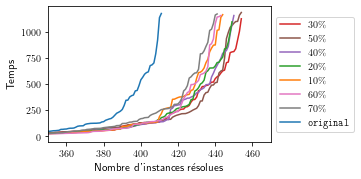

cacd


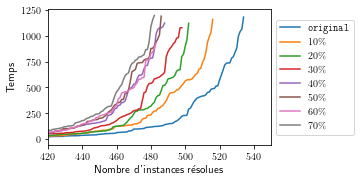

chs


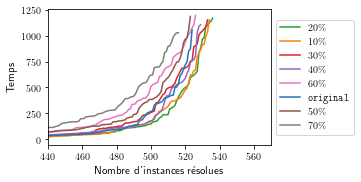

domddeg


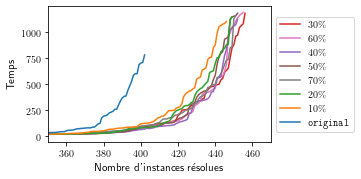

impact


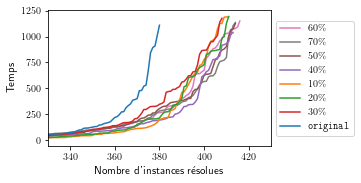

In [7]:
size = {
    'activity': (350, 470),
    'cacd': (420, 550),
    'chs': (440, 570),
    'domddeg': (350, 470),
    'impact': (330, 430),
}

for sub in analysis.groupby('h'):
    h = sub.data_frame.h.unique()[0]
    print(h)
    
    sub.cactus_plot(
        # Cactus plot specificities
        cumulated=False,
        cactus_col='cpu_time',
        show_marker=False,

        # Figure size
        figure_size=(4, 2.5),

        # Titles
        title='',
        x_axis_name='Nombre d\'instances résolues',
        y_axis_name='Temps',

        # Axis limits
        x_min=size[h][0],
        x_max=size[h][1],
        y_min=None,
        y_max=None,

        # Axis scaling
        logx=False,
        logy=False,

        # Legend parameters
        legend_location=Position.RIGHT,
        legend_offset=(-0.1, 0),
        ncol_legend=1,

        # Style mapping
        color_map=COLOR_MAP,
        #style_map=R_STYLE_MAP,

        # Title font styles
        #title_font_name='Times New Roman',
        title_font_color='#000000',
        title_font_size=11,
        title_font_weight=FontWeight.BOLD,

        # Label font styles
        #label_font_name='Times New Roman',
        label_font_color='#000000',
        label_font_size=11,
        label_font_weight=FontWeight.BOLD,

        # Others
        latex_writing=True,
        output=f"fig/2A-{h}.pdf",
        dynamic=False
    )
    plt.show()
    